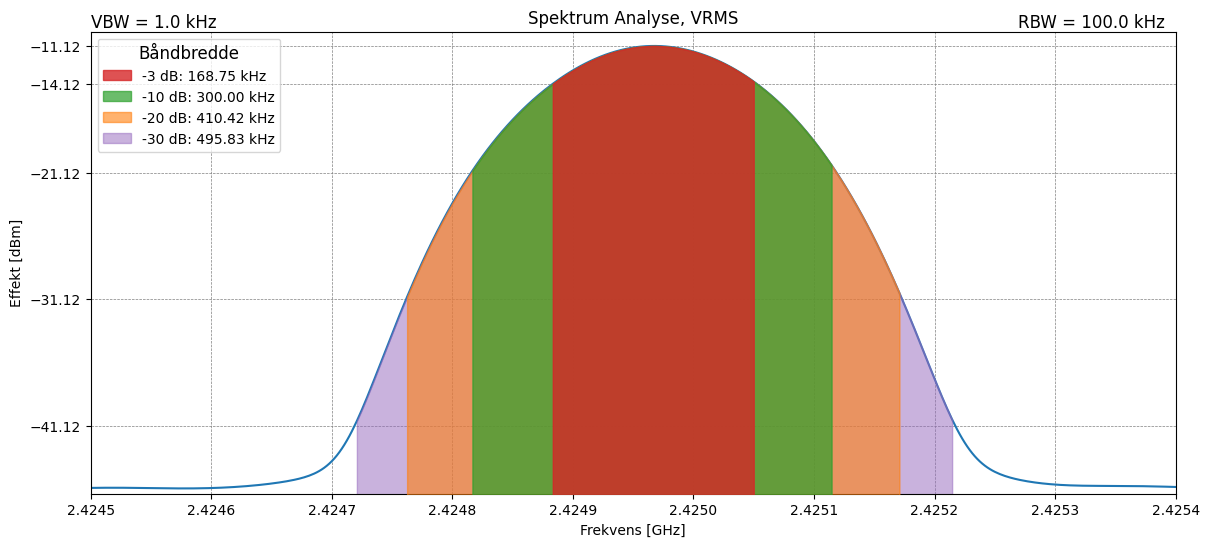

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path="Måling/alpha1_00.csv"
columns = ['Power [dBm]', 'Frequency[Hz]']
spektrum = pd.read_csv(file_path, sep=',', names=columns, skiprows=154)
spektrum['Frequency[GHz]'] = spektrum['Frequency[Hz]'] / 1e9
spektrum['Power [dBm]'] = spektrum['Power [dBm]'] + 30 # Fjerne attenuatorens effekt

RBW= 1e5 # Resolution Bandwidth in Hz
VBW = 1000 # Video Bandwidth in Hz

# Calculate the bandwidths based on the power thresholds
bw_thresholds = [3, 10, 20, 30] # dB thresholds below max power
max_power = max(spektrum['Power [dBm]'])
first_indecies = []
last_indecies = []

for bw_threshold in bw_thresholds:
    # Find first and last index where power is above bw_power
    first_index = spektrum[spektrum['Power [dBm]'] >= max_power - bw_threshold].index[0]
    last_index = spektrum[spektrum['Power [dBm]'] >= max_power - bw_threshold].index[-1]
    first_indecies.append(first_index)
    last_indecies.append(last_index)

# Calculate the bandwidths in kHz and baud rates
roll_off = 0.35 # Roll-off factor for the raised cosine filter
bandwidths = []
baud_rates = []
for first_index, last_index in zip(first_indecies, last_indecies):
    bandwidth = spektrum['Frequency[Hz]'][last_index] - spektrum['Frequency[Hz]'][first_index]
    bandwidths.append(bandwidth / 1000) # Convert to kHz
    baud_rates.append(bandwidth / (1 + roll_off) / 1000) # Assuming baud rate is half the bandwidth




bw_colors = ['tab:red', 'tab:green', 'tab:orange','tab:purple']

plt.figure(figsize=(14, 6))
plt.plot(spektrum['Frequency[GHz]'], spektrum['Power [dBm]'], linestyle='-', color='tab:blue')

for i, (first_index, last_index, bw_threshold, color) in enumerate(zip(first_indecies, last_indecies, bw_thresholds, bw_colors)):
    # Fill the area under the curve for each bandwidth threshold
    plt.fill_between(spektrum['Frequency[GHz]'][first_index:last_index], 
                     -50,spektrum['Power [dBm]'][first_index:last_index], 
                     color=color, alpha=0.8-i*0.1, label='-{} dB:'.format(bw_threshold)+' {:.2f} kHz'.format(bandwidths[i]),zorder = len(bw_thresholds)-i+1)
    
plt.legend(title="Båndbredde", loc='upper left', fontsize=10, title_fontsize=12)

plt.annotate('RBW = {:.1f} kHz'.format(RBW/1000), xy=(0.99, 1.01), xycoords='axes fraction', fontsize=12, ha='right')
plt.annotate('VBW = {:.1f} kHz'.format(VBW/1000), xy=(0, 1.01), xycoords='axes fraction', fontsize=12, ha='left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(2.4245, 2.4254)
plt.ylim(min(spektrum['Power [dBm]']), -10)

# add yticks at the maximum and at the threshold values
yticks = np.array([max_power] + [max_power - bw for bw in bw_thresholds])
plt.yticks(yticks, fontsize=10)
plt.xticks(np.arange(2.4245, 2.4255, 0.0001), fontsize=10)
plt.xlabel('Frekvens [GHz]')
plt.ylabel('Effekt [dBm]')
plt.title('Spektrum Analyse, VRMS')
plt.show()

Bandwidths (kHz):
Alpha                  0.35    0.50    0.65    0.75    1.00
Bandwidth Threshold                                        
-3 dB                158.33  160.42  162.50  162.50  168.75
-10 dB               268.75  275.00  281.25  285.42  300.00
-20 dB               360.42  368.75  377.08  385.42  410.42
-30 dB               435.42  443.75  456.25  468.75  495.83

Baud Rates (kHz):
Alpha                  0.35    0.50    0.65    0.75    1.00
Bandwidth Threshold                                        
-3 dB                117.28  106.94   98.48   92.86   84.38
-10 dB               199.07  183.33  170.45  163.10  150.00
-20 dB               266.98  245.83  228.54  220.24  205.21
-30 dB               322.53  295.83  276.52  267.86  247.92


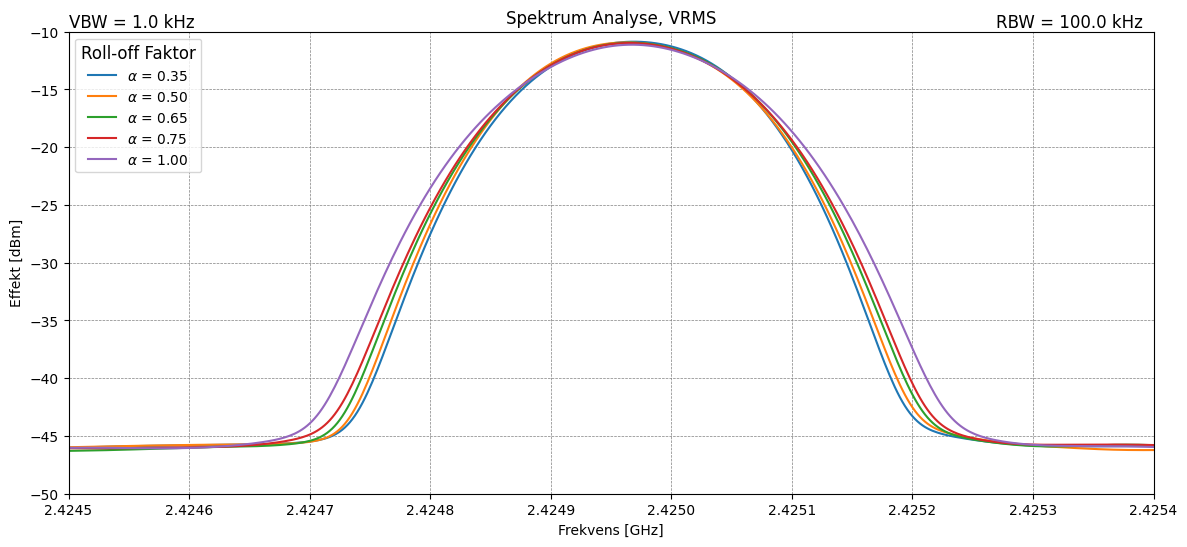

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path_dir="Måling/"
file_paths = ["alpha0_35.csv","alpha0_50.csv","alpha0_65.csv", "alpha0_75.csv", "alpha1_00.csv"]
columns = ['Power [dBm]', 'Frequency[Hz]']
alphas = [0.35, 0.50, 0.65, 0.75, 1.00] # roll-off factors
bw_thresholds = [3, 10, 20, 30] # dB thresholds under maximum power

RBW= 1e5 # Resolution Bandwidth in Hz
VBW = 1000 # Video Bandwidth in Hz

# Create a dictionary to store the dataframes for each alpha and bandwidth threshold

spektrums = {}
bandwidths = {}
baud_rates = {}
for alpha in alphas:
    bandwidths[alpha] = []
    baud_rates[alpha] = []

for file_path, alpha in zip(file_paths, alphas):
    spektrum = pd.read_csv(file_path_dir + file_path, sep=',', names=columns, skiprows=154)
    spektrum['Frequency[GHz]'] = spektrum['Frequency[Hz]'] / 1e9
    spektrum['Power [dBm]'] = spektrum['Power [dBm]'] + 30 # Fjerne attenuatorens effekt
    spektrums[alpha] = spektrum

    max_power = max(spektrum['Power [dBm]'])
    for bw_threshold in bw_thresholds:
        # Find first and last index where power is above bw_power
        first_index = spektrum[spektrum['Power [dBm]'] >= max_power - bw_threshold].index[0]
        last_index = spektrum[spektrum['Power [dBm]'] >= max_power - bw_threshold].index[-1]
        bandwidth = spektrum['Frequency[Hz]'][last_index] - spektrum['Frequency[Hz]'][first_index]
        bandwidth = bandwidth / 1000
        baud_rate = bandwidth / (1 + alpha) # Assuming baud rate is half the bandwidth
        bandwidths[alpha].append(bandwidth) # Convert to k
        baud_rates[alpha].append(baud_rate) # Assuming baud rate is half the bandwidth

    
# Make a tabeleau of the bandwidths and baud rates for each alpha and bandwidth threshold, with float 2 decimal
bandwidths = {alpha: [round(bw, 2) for bw in bandwidths[alpha]] for alpha in alphas}
baud_rates = {alpha: [round(br, 2) for br in baud_rates[alpha]] for alpha in alphas}
bandwidths_df = pd.DataFrame(bandwidths, index=bw_thresholds)
baud_rates_df = pd.DataFrame(baud_rates, index=bw_thresholds)
bandwidths_df.index = ['-{} dB'.format(bw) for bw in bandwidths_df.index]
baud_rates_df.index = ['-{} dB'.format(br) for br in baud_rates_df.index]
bandwidths_df.index.name = 'Bandwidth Threshold'
baud_rates_df.index.name = 'Bandwidth Threshold'
bandwidths_df.columns.name = 'Alpha'
baud_rates_df.columns.name = 'Alpha'
print("Bandwidths (kHz):")
print(bandwidths_df)
print("\nBaud Rates (kHz):")
print(baud_rates_df)

# Plot the spektrum for each alpha
plt.figure(figsize=(14, 6))
for alpha, spektrum in spektrums.items():
    plt.plot(spektrum['Frequency[GHz]'], spektrum['Power [dBm]'], linestyle='-', label=rf'$\alpha$ = {alpha:.2f}')

plt.annotate('RBW = {:.1f} kHz'.format(RBW/1000), xy=(0.99, 1.01), xycoords='axes fraction', fontsize=12, ha='right')
plt.annotate('VBW = {:.1f} kHz'.format(VBW/1000), xy=(0, 1.01), xycoords='axes fraction', fontsize=12, ha='left')
plt.legend(title="Roll-off Faktor", loc='upper left', fontsize=10, title_fontsize=12)
plt.xlim(2.4245, 2.4254)
plt.ylim(-50, -10)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# add yticks at the maximum and at the threshold values
yticks = np.arange(-50, -5, 5)
plt.yticks(yticks, fontsize=10)
plt.xticks(np.arange(2.4245, 2.4255, 0.0001), fontsize=10)
plt.xlabel('Frekvens [GHz]')
plt.ylabel('Effekt [dBm]')
plt.title('Spektrum Analyse, VRMS')
plt.show()